In [83]:
import pandas as pd
import numpy as np
# from scipy import stats
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# from sklearn.preprocessing import linearmixedseffects   
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
results_folder = '/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/plots'

data=pd.read_csv('/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv')


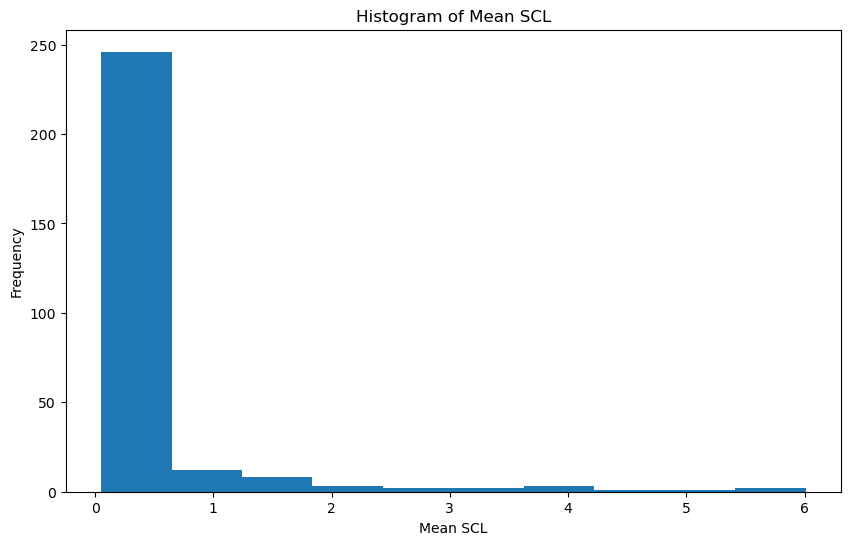

In [85]:
plt.figure(figsize=(10, 6)) 
plt.hist(data["Mean_SCL"], bins=10)
plt.title("Histogram of Mean SCL")
plt.xlabel("Mean SCL")
plt.ylabel("Frequency")
# plt.show()
plt.savefig(f"{results_folder}/Mean_SCL_histogram.png")


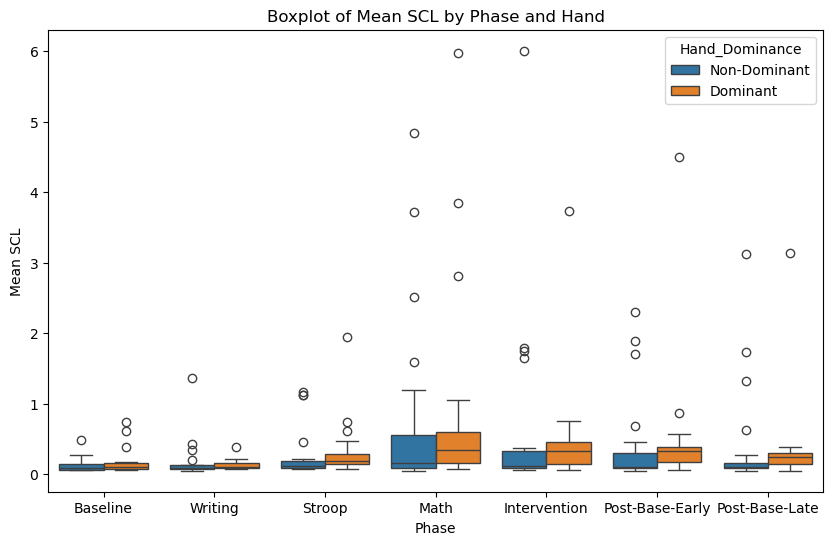

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Phase', y='Mean_SCL', hue='Hand_Dominance', data=data)
plt.title("Boxplot of Mean SCL by Phase and Hand")
plt.xlabel("Phase")
plt.ylabel("Mean SCL")
plt.legend(title='Hand_Dominance')
# plt.show() 
plt.savefig(f"{results_folder}/Mean_SCL_boxplot_handedness.png")

/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/1540354439.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hand_Dominance')


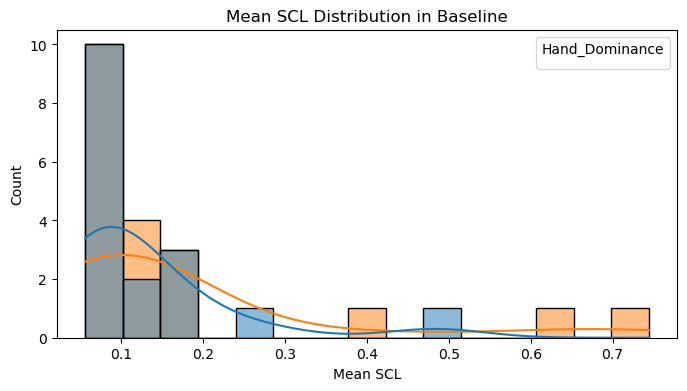

/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/1540354439.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hand_Dominance')


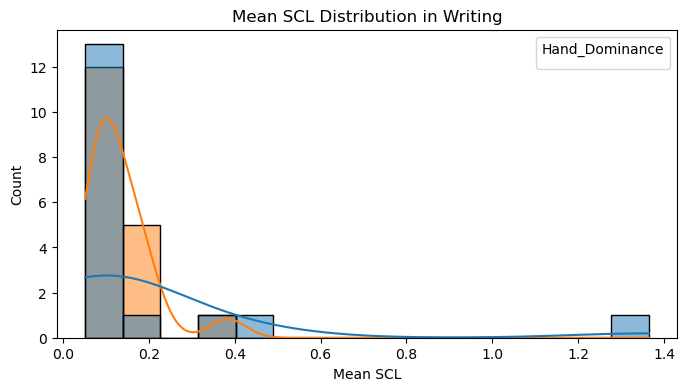

/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/1540354439.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hand_Dominance')


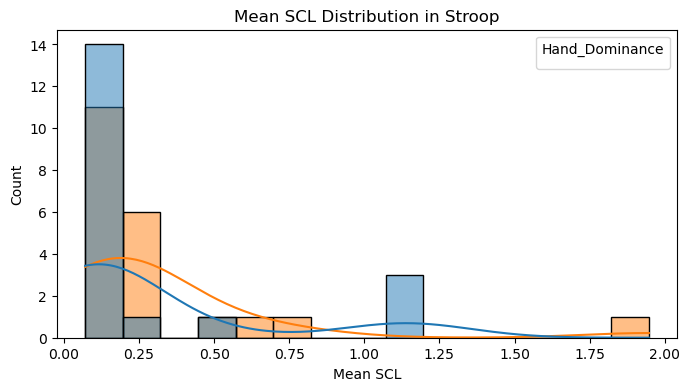

/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/1540354439.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hand_Dominance')


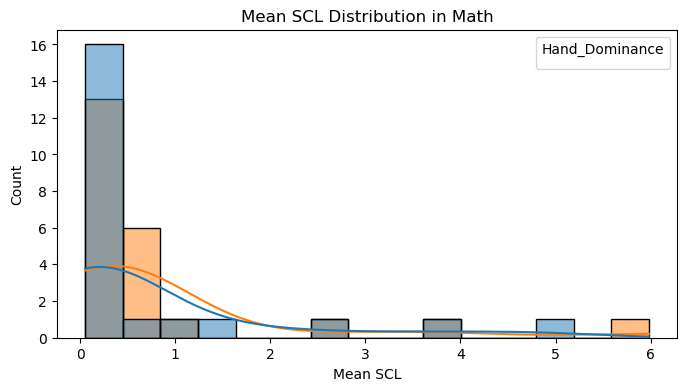

/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/1540354439.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hand_Dominance')


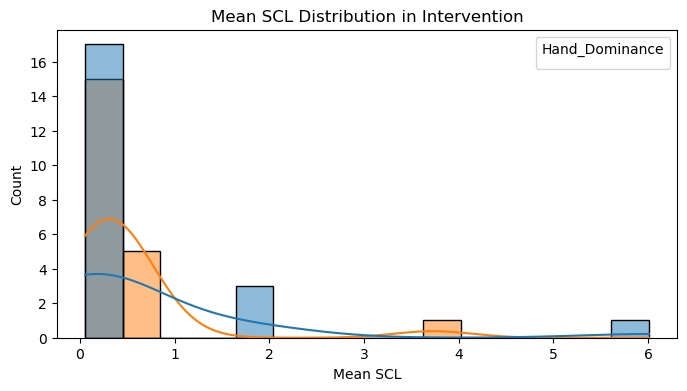

/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/1540354439.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hand_Dominance')


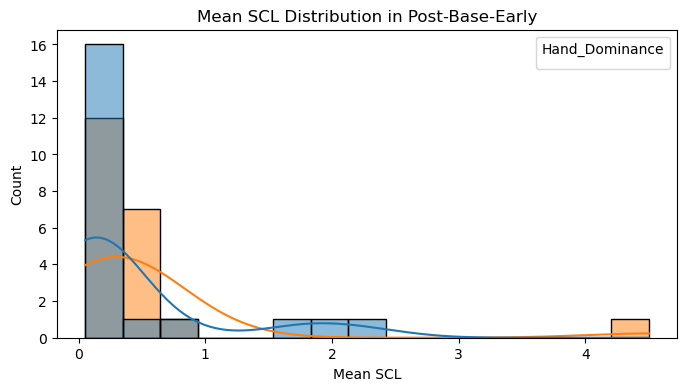

/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/1540354439.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Hand_Dominance')


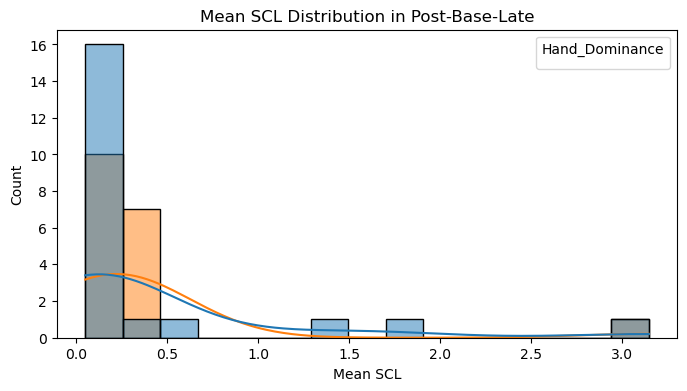

In [87]:
phases = data['Phase'].unique()

for phase in phases:
    plt.figure(figsize=(8, 4))
    subset = data[data['Phase'] == phase]
    sns.histplot(data=subset, x='Mean_SCL', hue='Hand_Dominance', kde=True, bins=15)
    plt.title(f"Mean SCL Distribution in {phase}")
    plt.xlabel("Mean SCL")
    plt.ylabel("Count")
    plt.legend(title='Hand_Dominance')
    plt.show()
    plt.savefig(f"{results_folder}/Mean_SCL_distribution_{phase}.png")
    plt.close()

In [88]:
from scipy.stats import normaltest

for phase in data['Phase'].unique():
    subset = data[data['Phase'] == phase]
    for hand in ['Non-Dominant','Dominant']:
        values = subset[subset['Hand_Dominance'] == hand]['Mean_SCL'].dropna()
        if len(values) > 7:  # normaltest needs n > 7
            stat, p = normaltest(values)
            print(f"{phase} - {hand}: p = {p:.4f}")



Baseline - Non-Dominant: p = 0.0000
Baseline - Dominant: p = 0.0000
Writing - Non-Dominant: p = 0.0000
Writing - Dominant: p = 0.0000
Stroop - Non-Dominant: p = 0.0019
Stroop - Dominant: p = 0.0000
Math - Non-Dominant: p = 0.0000
Math - Dominant: p = 0.0000
Intervention - Non-Dominant: p = 0.0000
Intervention - Dominant: p = 0.0000
Post-Base-Early - Non-Dominant: p = 0.0002
Post-Base-Early - Dominant: p = 0.0000
Post-Base-Late - Non-Dominant: p = 0.0000
Post-Base-Late - Dominant: p = 0.0000


/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [89]:
from scipy.stats import shapiro

for phase in phases:
    subset = data[data['Phase'] == phase]
    for hand in ['Non-Dominant','Dominant']:
        values = subset[subset['Hand_Dominance'] == hand]['Mean_SCL'].dropna()
        if len(values) > 3:  # Shapiro needs at least 3 values
            stat, p = shapiro(values)
            print(f"{phase} - {hand}: p = {p:.4f}")

Baseline - Non-Dominant: p = 0.0001
Baseline - Dominant: p = 0.0000
Writing - Non-Dominant: p = 0.0000
Writing - Dominant: p = 0.0003
Stroop - Non-Dominant: p = 0.0000
Stroop - Dominant: p = 0.0000
Math - Non-Dominant: p = 0.0000
Math - Dominant: p = 0.0000
Intervention - Non-Dominant: p = 0.0000
Intervention - Dominant: p = 0.0000
Post-Base-Early - Non-Dominant: p = 0.0000
Post-Base-Early - Dominant: p = 0.0000
Post-Base-Late - Non-Dominant: p = 0.0000
Post-Base-Late - Dominant: p = 0.0000


In [90]:
from scipy.stats import wilcoxon
# Prepare list of phases
phases = data['Phase'].dropna().unique()

print("Wilcoxon Signed-Rank Test Results (Left vs Right Hand per Phase):\n")

for phase in phases:
    # Get data for current phase
    subset = data[data['Phase'] == phase]

    # Pivot table to have Left and Right Mean_SCL side by side
    pivot = subset.pivot_table(index='Participant', columns='Hand_Dominance', values='Mean_SCL')

    # Drop participants with missing Left or Right
    paired = pivot.dropna(subset=['Non-Dominant','Dominant'])

    if len(paired) < 3:
        print(f"{phase}: Not enough valid pairs (n={len(paired)}), skipping.\n")
        continue

    # Run Wilcoxon test
    stat, p = wilcoxon(paired['Non-Dominant'], paired['Dominant'])

    print(f"{phase}: p = {p:.4f}, n = {len(paired)}")

Wilcoxon Signed-Rank Test Results (Left vs Right Hand per Phase):

Baseline: p = 0.1439, n = 16
Writing: p = 0.2312, n = 16
Stroop: p = 0.0665, n = 18
Math: p = 0.0587, n = 22
Intervention: p = 0.1769, n = 20
Post-Base-Early: p = 0.2753, n = 19
Post-Base-Late: p = 0.0984, n = 17


In [91]:
print(data['Hand_Dominance'].unique())
print(data.columns)

['Non-Dominant' 'Dominant']
Index(['Participant', 'Hand', 'Hand_Dominance', 'Phase', 'Intervention_Type',
       'Artifact_%', 'Mean_SCL', 'Reactivity_%', 'Recovery_%', 'TVSymp',
       'SCR_Count', 'SCR_Freq_Hz', 'Mean_SCR_Amp', 'Slope_SCL', 'Phasic_Power',
       'Second_Diff_Power'],
      dtype='object')


In [ ]:
import pandas as pd
from scipy.stats import wilcoxon
import numpy as np
data=pd.read_csv('/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv')
# Load your data
result_path="/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/"
# Set of numeric columns to test (drop non-features)
non_feature_cols = ['Participant', 'Hand', 'Hand_Dominance', 'Phase', 'Intervention_Type','Artifact_%']
feature_cols = ['Mean_SCL', 'Reactivity_%', 'Recovery_%', 'TVSymp','SCR_Count', 'SCR_Freq_Hz', 'Mean_SCR_Amp', 'Slope_SCL', 'Phasic_Power','Second_Diff_Power']
# Get unique phases

phases = data['Phase'].dropna().unique()

results = []

for phase in phases:
    subset = data[data['Phase'] == phase]

    for feature in feature_cols:
        pivot = subset.pivot_table(index='Participant', columns='Hand_Dominance', values=feature)

        # 🛑 Check if both hands exist before continuing
        if not set(['Non-Dominant', 'Dominant']).issubset(pivot.columns):
            results.append({'Phase': phase, 'Feature': feature, 'n': 0, 'p': np.nan})
            continue

        # Drop rows with missing data in either hand
        paired = pivot.dropna(subset=['Non-Dominant', 'Dominant'])

        if len(paired) < 3:
            results.append({'Phase': phase, 'Feature': feature, 'n': len(paired), 'p': np.nan})
            continue

        try:
            stat, p = wilcoxon(paired['Non-Dominant'], paired['Dominant'])
            results.append({'Phase': phase, 'Feature': feature, 'n': len(paired), 'p': p})
        except ValueError:
            results.append({'Phase': phase, 'Feature': feature, 'n': len(paired), 'p': np.nan})


# Convert to DataFrame
results_df = pd.DataFrame(results)

# Optional: sort by p-value
results_df = results_df.sort_values(by="p")

# Save results
results_df.to_csv(f"{result_path}wilcoxon_results_all_features.csv", index=False)

# Preview top results
print(results_df)

             Phase            Feature   n         p
19         Writing  Second_Diff_Power  16  0.007629
9         Baseline  Second_Diff_Power  16  0.009186
45    Intervention        SCR_Freq_Hz  20  0.019117
6         Baseline       Mean_SCR_Amp  16  0.026757
65  Post-Base-Late        SCR_Freq_Hz  17  0.044769
..             ...                ...  ..       ...
2         Baseline         Recovery_%   0       NaN
12         Writing         Recovery_%   0       NaN
22          Stroop         Recovery_%   0       NaN
32            Math         Recovery_%   0       NaN
42    Intervention         Recovery_%   0       NaN

[70 rows x 4 columns]


In [107]:
from statsmodels.stats.multitest import multipletests

# Apply correction (FDR recommended)
result_path="/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/"
results_df=pd.read_csv(f"{result_path}wilcoxon_results_all_features.csv")
pvals = results_df["p"].values
_, pvals_corrected, _, _ = multipletests(pvals, method="fdr_bh")  # or method="bonferroni"

# Add to your DataFrame
results_df["p_corrected"] = pvals_corrected
results_df["significant"] = results_df["p_corrected"] < 0.05

# Save corrected results
results_df.to_csv(f"{result_path}wilcoxon_results_all_features_corrected.csv", index=False)

# View top corrected results
print(results_df.sort_values(by="p_corrected").head(10))

            Phase            Feature   n         p  p_corrected  significant
0         Writing  Second_Diff_Power  16  0.007629          NaN        False
1        Baseline  Second_Diff_Power  16  0.009186          NaN        False
2    Intervention        SCR_Freq_Hz  20  0.019117          NaN        False
3        Baseline       Mean_SCR_Amp  16  0.026757          NaN        False
4  Post-Base-Late        SCR_Freq_Hz  17  0.044769          NaN        False
5          Stroop       Phasic_Power  18  0.048279          NaN        False
6  Post-Base-Late          SCR_Count  17  0.050537          NaN        False
7        Baseline             TVSymp  16  0.050659          NaN        False
8            Math           Mean_SCL  22  0.058690          NaN        False
9          Stroop          Slope_SCL  18  0.059937          NaN        False


In [108]:
from statsmodels.stats.multitest import multipletests
result_path="/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/"
results_df=pd.read_csv(f"{result_path}wilcoxon_results_all_features.csv")
# Bonferroni correction
pvals = results_df["p"].values
_, pvals_corrected, _, _ = multipletests(pvals, method="bonferroni")

# Add corrected p-values and significance flag
results_df["p_corrected"] = pvals_corrected
results_df["significant"] = results_df["p_corrected"] < 0.05

# Save updated results
results_df.to_csv(f"{result_path}wilcoxon_results_all_features_corrected_bonferroni.csv", index=False)

# View most significant comparisons
print(results_df.sort_values(by="p_corrected").head(10))

              Phase            Feature   n         p  p_corrected  significant
0           Writing  Second_Diff_Power  16  0.007629     0.534058        False
1          Baseline  Second_Diff_Power  16  0.009186     0.643005        False
34          Writing       Phasic_Power  16  0.231201     1.000000        False
35          Writing       Reactivity_%  11  0.240234     1.000000        False
36  Post-Base-Early       Mean_SCR_Amp  19  0.241253     1.000000        False
37  Post-Base-Early           Mean_SCL  19  0.275341     1.000000        False
38  Post-Base-Early       Phasic_Power  19  0.275341     1.000000        False
39  Post-Base-Early             TVSymp  19  0.275341     1.000000        False
40           Stroop       Mean_SCR_Amp  18  0.346550     1.000000        False
41           Stroop        SCR_Freq_Hz  18  0.355959     1.000000        False


In [109]:
# Load the results
results_df = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/wilcoxon_results_all_features_corrected_bonferroni.csv")

# Filter for significant results (p < 0.05)
significant = results_df[results_df["p_corrected"] <= 0.05].sort_values(by="p_corrected")

# Show them
print(significant)

Empty DataFrame
Columns: [Phase, Feature, n, p, p_corrected, significant]
Index: []


In [93]:
# Load the results
results_df = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/wilcoxon_results_all_features.csv")

# Filter for significant results (p < 0.05)
significant = results_df[results_df["p"] <= 0.05].sort_values(by="p")

# Show them
print(significant)

            Phase            Feature   n         p
0         Writing  Second_Diff_Power  16  0.007629
1        Baseline  Second_Diff_Power  16  0.009186
2    Intervention        SCR_Freq_Hz  20  0.019117
3        Baseline       Mean_SCR_Amp  16  0.026757
4  Post-Base-Late        SCR_Freq_Hz  17  0.044769
5          Stroop       Phasic_Power  18  0.048279


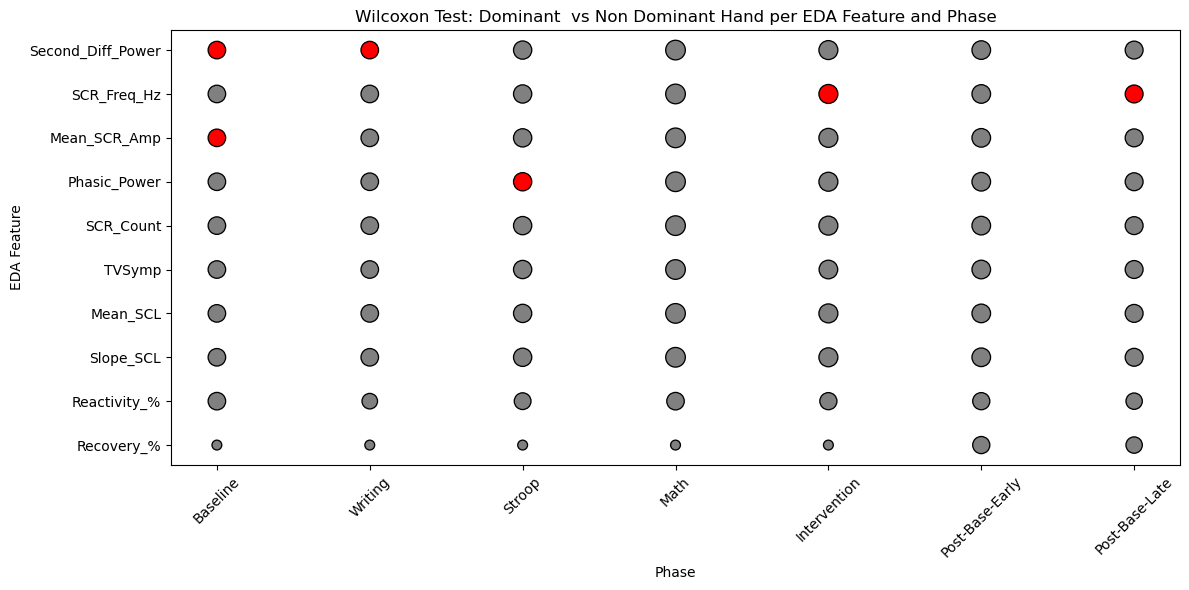

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your results
results_df = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/wilcoxon_results_all_features.csv")

# Define the correct phase order (your study protocol)
phase_order = [
    'Baseline',
    'Writing',
    'Stroop',
    'Math',
    'Intervention',
    'Post-Base-Early',
    'Post-Base-Late'
]

# Add a column for significance
results_df['Significant'] = results_df['p'] < 0.05

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=results_df,
    x=pd.Categorical(results_df['Phase'], categories=phase_order, ordered=True),
    y='Feature',
    hue='Significant',
    palette={True: 'red', False: 'gray'},
    size='n',
    sizes=(50, 200),
    edgecolor='black',
    legend=False  # ⛔️ Hide legend
)

plt.title('Wilcoxon Test: Dominant  vs Non Dominant Hand per EDA Feature and Phase')
plt.xlabel('Phase')
plt.ylabel('EDA Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/wilcoxon_significance_plot_clean.png")
plt.show()

Phase              Baseline   Writing    Stroop      Math  Intervention  \
Feature                                                                   
Mean_SCL           0.842060  0.636010  1.176944  1.231435      0.752387   
Mean_SCR_Amp       1.572570  1.184428  0.460234  0.861731      0.109513   
Phasic_Power       0.842060  0.636010  1.316243  1.164663      0.722739   
Reactivity_%            NaN  0.619365  0.174055  0.980536      0.118310   
Recovery_%              NaN       NaN       NaN       NaN           NaN   
SCR_Count          0.147589  0.305024  0.405125  0.124801      0.990780   
SCR_Freq_Hz        0.134735  0.305024  0.448600  0.110962      1.718574   
Second_Diff_Power  2.036883  2.117510  0.305325  0.263930      0.943145   
Slope_SCL          0.045790  0.106820  1.222308  0.834113      0.366094   
TVSymp             1.295342  1.029445  0.706885  0.918374      0.805756   

Phase              Post-Base-Early  Post-Base-Late  
Feature                                       

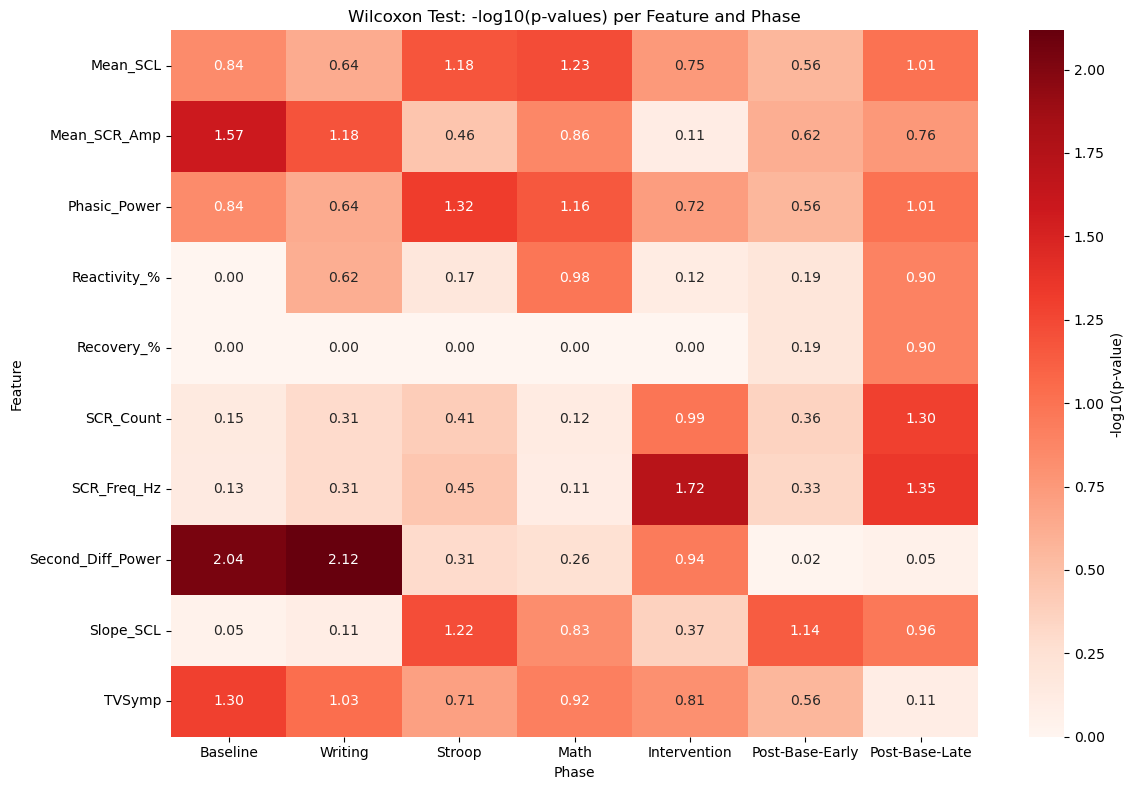

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


phase_order = [
    'Baseline',
    'Writing',
    'Stroop',
    'Math',
    'Intervention',
    'Post-Base-Early',
    'Post-Base-Late'
]

# Load results
results_df = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/wilcoxon_results_all_features.csv")
results_df["Phase"] = pd.Categorical(results_df["Phase"], categories=phase_order, ordered=True)

# Pivot p-values for heatmap
heatmap_data = results_df.pivot(index="Feature", columns="Phase", values="p")

# Convert p-values to -log10(p)
heatmap_logp = -np.log10(heatmap_data)
print(heatmap_logp)
heatmap_logp = heatmap_logp.fillna(0)  # Replace missing with 0

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_logp, annot=True, fmt=".2f",
    cmap="Reds", cbar_kws={'label': '-log10(p-value)'}
)
plt.title("Wilcoxon Test: -log10(p-values) per Feature and Phase")
plt.tight_layout()
plt.savefig("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/wilcoxon_heatmap_logp.png")
plt.show()

In [96]:
# Set phase order again for sorting
results_df["Phase"] = pd.Categorical(results_df["Phase"], categories=phase_order, ordered=True)

# Add significance flag
results_df["Significant"] = results_df["p"] < 0.05

# Sort by phase and p-value
sorted_table = results_df.sort_values(by=["Phase", "p"])

# Highlight function
def highlight_significance(val):
    return 'background-color: salmon' if val else ''

# Style table
styled_table = sorted_table.style.applymap(highlight_significance, subset=["Significant"])
styled_table.format({"p": "{:.4f}"})

styled_table.to_excel("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/wilcoxon_summary_highlighted.xlsx", engine='openpyxl')

/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/2640023626.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = sorted_table.style.applymap(highlight_significance, subset=["Significant"])


In [97]:
import pandas as pd

# Load your data
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv")

# Extract baseline Mean_SCL per participant and hand
baseline = data[data["Phase"] == "Baseline"][["Participant", "Hand_Dominance", "Mean_SCL"]]
baseline = baseline.rename(columns={"Mean_SCL": "Baseline_SCL"})

# Merge back into main data
data = pd.merge(data, baseline, on=["Participant", "Hand_Dominance"], how="left")

Mean_SCL ~ Phase + Hand + Baseline_SCL

In [98]:
!pip install statsmodels

In [99]:
import statsmodels.formula.api as smf

# Drop rows with missing Mean_SCL
subset = data.dropna(subset=["Mean_SCL", "Baseline_SCL"])

# Build model
model = smf.mixedlm(
    "Mean_SCL ~ Phase + Hand_Dominance + Baseline_SCL",
    data=subset,
    groups=subset["Participant"]
)

result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       Mean_SCL 
No. Observations:       242           Method:                   REML     
No. Groups:             21            Scale:                    0.3253   
Min. group size:        6             Log-Likelihood:           -238.2837
Max. group size:        14            Converged:                Yes      
Mean group size:        11.5                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      -0.338    0.177 -1.908 0.056 -0.684  0.009
Phase[T.Intervention]           0.487    0.135  3.618 0.000  0.223  0.751
Phase[T.Math]                   0.797    0.133  6.008 0.000  0.537  1.057
Phase[T.Post-Base-Early]        0.352    0.134  2.638 0.

In [100]:
import statsmodels.formula.api as smf
# Load your data
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv")

# Extract baseline Mean_SCL per participant and hand
baseline = data[data["Phase"] == "Baseline"][["Participant", "Hand", "Mean_SCL"]]
baseline = baseline.rename(columns={"Mean_SCL": "Baseline_SCL"})

# Merge back into main data
data = pd.merge(data, baseline, on=["Participant", "Hand"], how="left")

# Drop rows with missing Mean_SCL
subset = data.dropna(subset=["Mean_SCL", "Baseline_SCL"])

# Build model
model = smf.mixedlm(
    "Mean_SCL ~ Phase + Hand + Baseline_SCL",
    data=subset,
    groups=subset["Participant"]
)

result = model.fit()
print(result.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Mean_SCL 
No. Observations:     242         Method:                 REML     
No. Groups:           21          Scale:                  0.3270   
Min. group size:      6           Log-Likelihood:         -238.9638
Max. group size:      14          Converged:              Yes      
Mean group size:      11.5                                         
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                -0.236    0.176 -1.339 0.181 -0.582  0.110
Phase[T.Intervention]     0.489    0.135  3.618 0.000  0.224  0.753
Phase[T.Math]             0.797    0.133  5.992 0.000  0.536  1.057
Phase[T.Post-Base-Early]  0.353    0.134  2.639 0.008  0.091  0.616
Phase[T.Post-Base-Late]   0.312    0.137  2.271 0.023  0.043  0

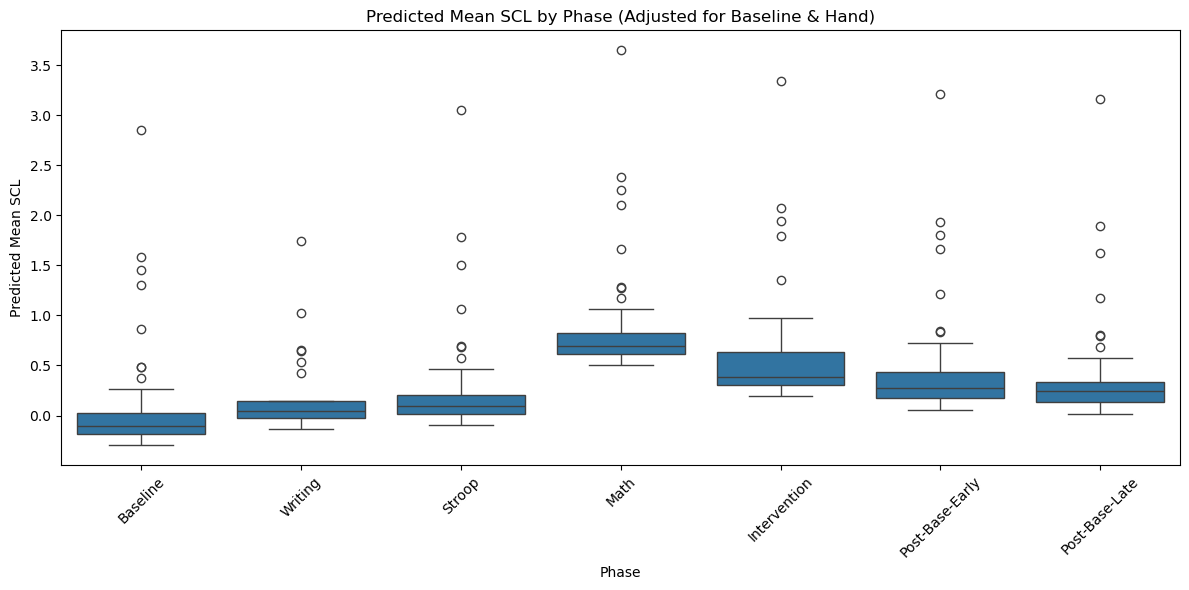

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add predicted values to your data
data["Predicted_SCL"] = result.fittedvalues  # from your model result object

# Boxplot of predicted values across phases
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Phase", y="Predicted_SCL", order=[
    'Baseline', 'Writing', 'Stroop', 'Math', 'Intervention', 'Post-Base-Early', 'Post-Base-Late'
])
plt.title("Predicted Mean SCL by Phase (Adjusted for Baseline & Hand)")
plt.ylabel("Predicted Mean SCL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("predicted_mean_scl_by_phase.png")
plt.show()

In [102]:
import statsmodels.formula.api as smf
import pandas as pd

# Load your dataset again if needed
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv")

# Get baseline for SCR_Amp
baseline_amp = data[data["Phase"] == "Baseline"][["Participant", "Hand_Dominance", "Mean_SCR_Amp"]]
baseline_amp = baseline_amp.rename(columns={"Mean_SCR_Amp": "Baseline_SCR_Amp"})

# Merge into main data
data = pd.merge(data, baseline_amp, on=["Participant", "Hand_Dominance"], how="left")

# Drop missing values
subset_amp = data.dropna(subset=["Mean_SCR_Amp", "Baseline_SCR_Amp"])

# Fit the model
model_amp = smf.mixedlm(
    "Mean_SCR_Amp ~ Phase + Hand_Dominance + Baseline_SCR_Amp",
    data=subset_amp,
    groups=subset_amp["Participant"]
).fit()

print(model_amp.summary())

                  Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      Mean_SCR_Amp
No. Observations:      242          Method:                  REML        
No. Groups:            21           Scale:                   0.0024      
Min. group size:       6            Log-Likelihood:          340.6126    
Max. group size:       14           Converged:               Yes         
Mean group size:       11.5                                              
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      -0.001    0.013 -0.051 0.959 -0.027  0.025
Phase[T.Intervention]           0.018    0.011  1.573 0.116 -0.004  0.041
Phase[T.Math]                   0.026    0.011  2.331 0.020  0.004  0.049
Phase[T.Post-Base-Early]        0.020    0.011  1.736 0.

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# Load your data
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv")


# Extract baseline Mean_SCL per participant and hand
baseline = data[data["Phase"] == "Baseline"][["Participant", "Hand_Dominance", "Mean_SCL"]]
baseline = baseline.rename(columns={"Mean_SCL": "Baseline_SCL"})

# Merge back into main data
data = pd.merge(data, baseline, on=["Participant", "Hand_Dominance"], how="left")
# First: make sure the column is categorical and ordered

data["Hand_Dominance"] = pd.Categorical(data["Hand_Dominance"], categories=["Non-Dominant", "Dominant"],ordered=True)


data_clean = data.dropna(subset=["Mean_SCL", "Baseline_SCL", "Phase", "Hand_Dominance"])
data_clean = data_clean[data_clean["Participant"].notnull()]  # make sure group ID is clean
data_clean = data_clean.reset_index(drop=True)  # <- important fix!




model = smf.mixedlm(
    "Mean_SCL ~ Phase + Hand_Dominance + Baseline_SCL",
    data=data_clean,
    groups=data_clean["Participant"]
).fit()

print(model.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Mean_SCL 
No. Observations:       242         Method:                 REML     
No. Groups:             21          Scale:                  0.3253   
Min. group size:        6           Log-Likelihood:         -238.2837
Max. group size:        14          Converged:              Yes      
Mean group size:        11.5                                         
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                  -0.236    0.168 -1.408 0.159 -0.564  0.092
Phase[T.Intervention]       0.487    0.135  3.618 0.000  0.223  0.751
Phase[T.Math]               0.797    0.133  6.008 0.000  0.537  1.057
Phase[T.Post-Base-Early]    0.352    0.134  2.638 0.008  0.091  0.614
Phase[T.Post-Base-Late]     0.308   

In [105]:
import pandas as pd
import statsmodels.formula.api as smf

# Load your data
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv")

# List of features to test
feature_cols = [
    'Mean_SCL', 'Reactivity_%', 'Recovery_%', 'TVSymp', 'SCR_Count',
    'SCR_Freq_Hz', 'Mean_SCR_Amp', 'Slope_SCL', 'Phasic_Power', 'Second_Diff_Power'
]

# Dictionary to store results
model_results = {}

for feature in feature_cols:
    print(f"\n=== Running model for {feature} ===")
    
    # Get each participant's baseline for that feature
    baseline = data[data["Phase"] == "Baseline"][["Participant", "Hand_Dominance", feature]]
    baseline = baseline.rename(columns={feature: f"Baseline_{feature}"})

    # Merge into full dataset
    merged = pd.merge(data, baseline, on=["Participant", "Hand_Dominance"], how="left")

    # Drop missing
    merged_clean = merged.dropna(subset=[feature, f"Baseline_{feature}"])

    # Build formula
    formula = f"{feature} ~ Phase + Hand_Dominance + Baseline_{feature}"

    try:
        # Fit model
        model = smf.mixedlm(formula, data=merged_clean, groups=merged_clean["Participant"]).fit()
        print(model.summary())
        model_results[feature] = model
    except Exception as e:
        print(f"Model failed for {feature}: {e}")


=== Running model for Mean_SCL ===
                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       Mean_SCL 
No. Observations:       242           Method:                   REML     
No. Groups:             21            Scale:                    0.3253   
Min. group size:        6             Log-Likelihood:           -238.2837
Max. group size:        14            Converged:                Yes      
Mean group size:        11.5                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      -0.338    0.177 -1.908 0.056 -0.684  0.009
Phase[T.Intervention]           0.487    0.135  3.618 0.000  0.223  0.751
Phase[T.Math]                   0.797    0.133  6.008 0.000  0.537  1.057
Phase[T.Post-Base-Ea

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/su

                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       Slope_SCL
No. Observations:       242           Method:                   REML     
No. Groups:             21            Scale:                    0.0000   
Min. group size:        6             Log-Likelihood:           1022.0598
Max. group size:        14            Converged:                Yes      
Mean group size:        11.5                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      -0.000    0.001 -0.307 0.759 -0.001  0.001
Phase[T.Intervention]          -0.001    0.001 -1.029 0.304 -0.002  0.001
Phase[T.Math]                   0.001    0.001  1.462 0.144 -0.000  0.002
Phase[T.Post-Base-Early]       -0.000    0.001 -0.321 0.

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


    Feature            Phase      Coef        SE             p
0  Mean_SCL     Intervention  0.487302  0.134703  2.973480e-04
1  Mean_SCL             Math  0.796686  0.132613  1.882991e-09
2  Mean_SCL  Post-Base-Early  0.352415  0.133606  8.346286e-03
3  Mean_SCL   Post-Base-Late  0.308098  0.136994  2.451269e-02
4  Mean_SCL           Stroop  0.200294  0.134650  1.368800e-01
    Feature            Phase      Coef        SE             p
0  Mean_SCL     Intervention  0.487302  0.134703  2.973480e-04
1  Mean_SCL             Math  0.796686  0.132613  1.882991e-09
2  Mean_SCL  Post-Base-Early  0.352415  0.133606  8.346286e-03
3  Mean_SCL   Post-Base-Late  0.308098  0.136994  2.451269e-02
4  Mean_SCL           Stroop  0.200294  0.134650  1.368800e-01


/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/1021698679.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


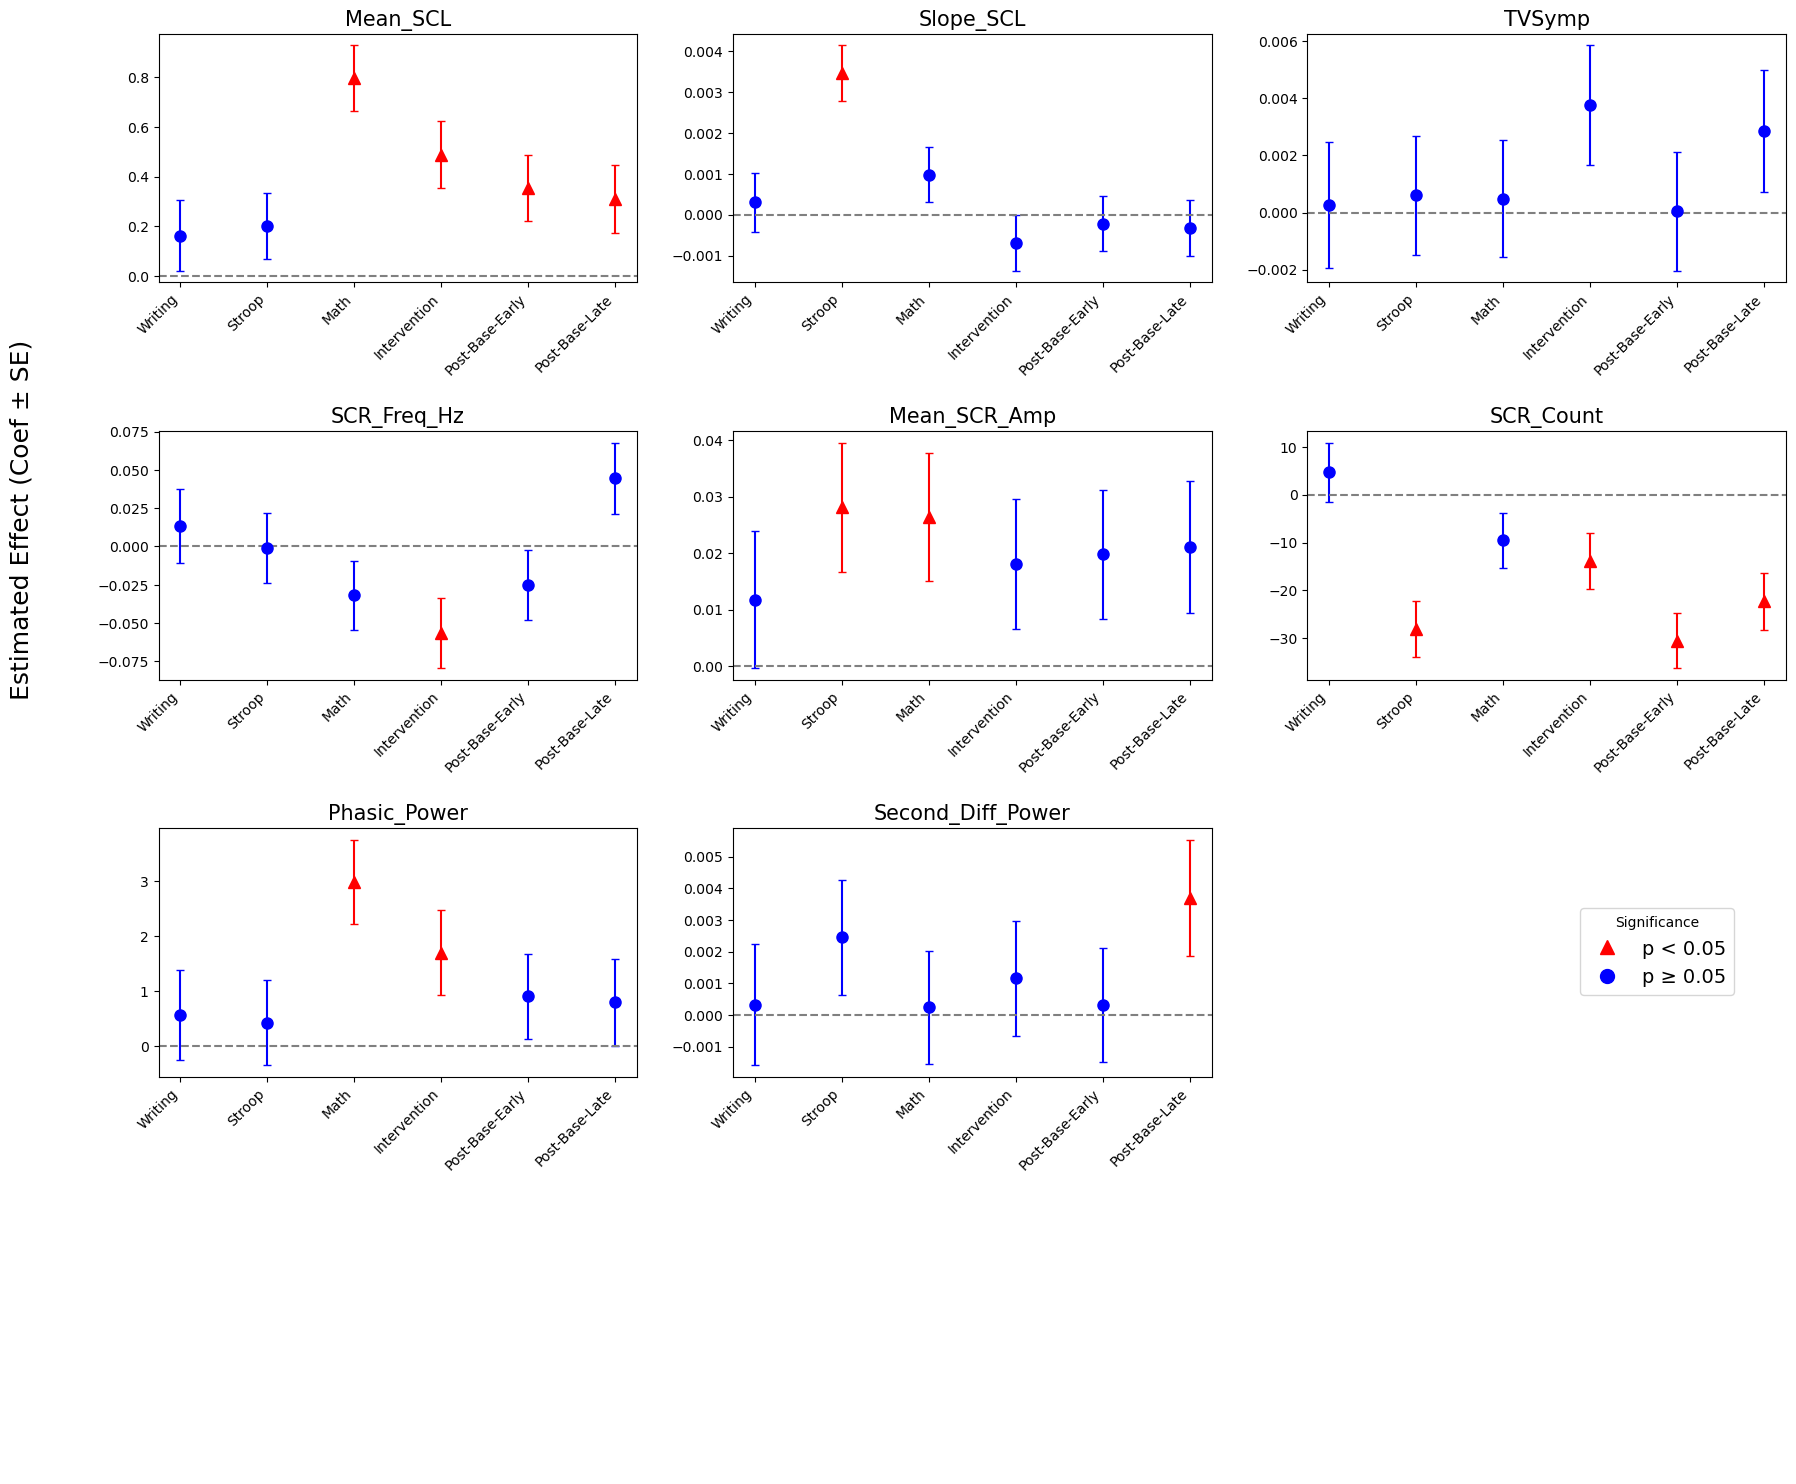

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt
rows = []

for feature, model in model_results.items():
    try:

        params = model.params        # Coefficients
        bse = model.bse              # Standard errors
        pvals = model.pvalues        # p-values
        
        for param in model.params.index:
            if "Phase[T." in param:
                rows.append({
                    "Feature": feature,
                    "Phase": param.replace("Phase[T.", "").replace("]", ""),
                    "Coef": model.params[param],
                    "SE": model.bse[param],
                    "p": model.pvalues[param]
                })
    except Exception as e:
        print(f"Failed extracting from {feature}: {e}")

df_plot = pd.DataFrame(rows)
# Load the mixed model output you saved earlier
# df_plot = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv")
print(df_plot.head())




# Define phase + feature order
phase_order = [
    'Writing', 'Stroop', 'Math',
    'Intervention', 'Post-Base-Early', 'Post-Base-Late'
]

feature_order = [
    'Mean_SCL', 'Slope_SCL', 'TVSymp',
    'SCR_Freq_Hz', 'Mean_SCR_Amp', 'SCR_Count',
    'Phasic_Power', 'Second_Diff_Power',
    'Reactivity_%', 'Recovery_%'
]

df_plot["Phase"] = pd.Categorical(df_plot["Phase"], categories=phase_order, ordered=True)
print(df_plot.head())
df_plot["Feature"] = pd.Categorical(df_plot["Feature"], categories=feature_order, ordered=True)

x_positions = np.arange(len(phase_order))

def marker_for_p(p): return '^' if p < 0.05 else 'o'
def color_for_p(p):  return 'red' if p < 0.05 else 'blue'

n_features = len(feature_order)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

# ❗ Remove sharex=True so every subplot can show its xticks
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(21, 18),
    gridspec_kw={'hspace': 0.6}  # extra vertical space
)
axes = axes.flatten()

for i, feature in enumerate(feature_order):
    ax = axes[i]
    subset = df_plot[df_plot["Feature"] == feature]

    if subset.empty:
        ax.axis('off')
        continue

    subset = subset.sort_values("Phase")

    y = subset["Coef"].values
    yerr = subset["SE"].values
    markers = subset["p"].apply(marker_for_p).values
    colors = subset["p"].apply(color_for_p).values

    for xi, yi, err, m, c in zip(x_positions, y, yerr, markers, colors):
        ax.errorbar(xi, yi, yerr=err, fmt=m, color=c, markersize=8, capsize=3)

    ax.axhline(0, color="gray", linestyle="--")
    ax.set_title(feature, fontsize=15)
    

    # ❗ FORCE xticks to show on *every* subplot
    ax.set_xticks(x_positions)
    ax.set_xticklabels(phase_order, rotation=45, ha="right")

# Turn off unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Legend
fig.legend(
    handles=[
        plt.Line2D([0], [0], marker='^', color='red', linestyle='none', markersize=10),
        plt.Line2D([0], [0], marker='o', color='blue', linestyle='none', markersize=10),
    ],
    labels=['p < 0.05', 'p ≥ 0.05'],
    title="Significance",
    bbox_to_anchor=(.88, 0.4),
    fontsize=14
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(hspace=0.7, bottom=0.08)  # ensure xtick labels aren't cut
# Global Y-label for the entire figure
fig.text(
    0.06, 0.61,
    'Estimated Effect (Coef ± SE)',
    va='center', ha='center',
    rotation='vertical',
    fontsize=18
)
plt.show()
fig.savefig("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/final_mixed_model_phase_effects_separate_subplots.png")

In [82]:
import pandas as pd
import statsmodels.formula.api as smf

# Load your data
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy_with_duration.csv")

# List of features to test
feature_cols = [
    'Mean_SCL', 'Reactivity_%', 'Recovery_%', 'TVSymp', 'SCR_Count',
    'SCR_Freq_Hz', 'Mean_SCR_Amp', 'Slope_SCL', 'Phasic_Power', 'Second_Diff_Power'
]

# Dictionary to store results
model_results = {}

for feature in feature_cols:
    print(f"\n=== Running model for {feature} ===")
    
    # Get each participant's baseline for that feature
    baseline = data[data["Phase"] == "Baseline"][["Participant", "Hand_Dominance", feature]]
    baseline = baseline.rename(columns={feature: f"Baseline_{feature}"})

    # Merge into full dataset
    merged = pd.merge(data, baseline, on=["Participant", "Hand_Dominance"], how="left")

    # Drop rows with missing values (including duration)
    merged_clean = merged.dropna(subset=[feature, f"Baseline_{feature}", "Phase_Duration_seconds"])

    # Build model formula with duration
    formula = f"{feature} ~ Phase + Hand_Dominance + Baseline_{feature} + Phase_Duration_seconds"

    try:
        # Fit the model
        model = smf.mixedlm(formula, data=merged_clean, groups=merged_clean["Participant"]).fit()
        print(model.summary())
        model_results[feature] = model
    except Exception as e:
        print(f"Model failed for {feature}: {e}")


=== Running model for Mean_SCL ===
                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       Mean_SCL 
No. Observations:       242           Method:                   REML     
No. Groups:             21            Scale:                    0.3250   
Min. group size:        6             Log-Likelihood:           -243.3068
Max. group size:        14            Converged:                Yes      
Mean group size:        11.5                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.094    0.371  0.253 0.801 -0.633  0.820
Phase[T.Intervention]           0.628    0.172  3.658 0.000  0.291  0.964
Phase[T.Math]                   0.797    0.133  6.015 0.000  0.537  1.057
Phase[T.Post-Base-Ea

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       Slope_SCL
No. Observations:       242           Method:                   REML     
No. Groups:             21            Scale:                    0.0000   
Min. group size:        6             Log-Likelihood:           1010.8263
Max. group size:        14            Converged:                No       
Mean group size:        11.5                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                      -0.000    0.002 -0.090 0.929 -0.003  0.003
Phase[T.Intervention]          -0.001    0.001 -0.816 0.414 -0.002  0.001
Phase[T.Math]                   0.001    0.001  1.458 0.145 -0.000  0.002
Phase[T.Post-Base-Early]       -0.000    0.001 -0.190 0.

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packa

    Feature            Phase      Coef        SE             p
0  Mean_SCL     Intervention  0.627779  0.171613  2.540917e-04
1  Mean_SCL             Math  0.797232  0.132547  1.802124e-09
2  Mean_SCL  Post-Base-Early  0.090866  0.238936  7.037284e-01
3  Mean_SCL   Post-Base-Late  0.045261  0.241654  8.514295e-01
4  Mean_SCL           Stroop -0.065521  0.242208  7.867636e-01
    Feature            Phase      Coef        SE             p
0  Mean_SCL     Intervention  0.627779  0.171613  2.540917e-04
1  Mean_SCL             Math  0.797232  0.132547  1.802124e-09
2  Mean_SCL  Post-Base-Early  0.090866  0.238936  7.037284e-01
3  Mean_SCL   Post-Base-Late  0.045261  0.241654  8.514295e-01
4  Mean_SCL           Stroop -0.065521  0.242208  7.867636e-01


/var/folders/qm/1w6wxmb547l887grhpwg7bs40000gn/T/ipykernel_78248/2765837601.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


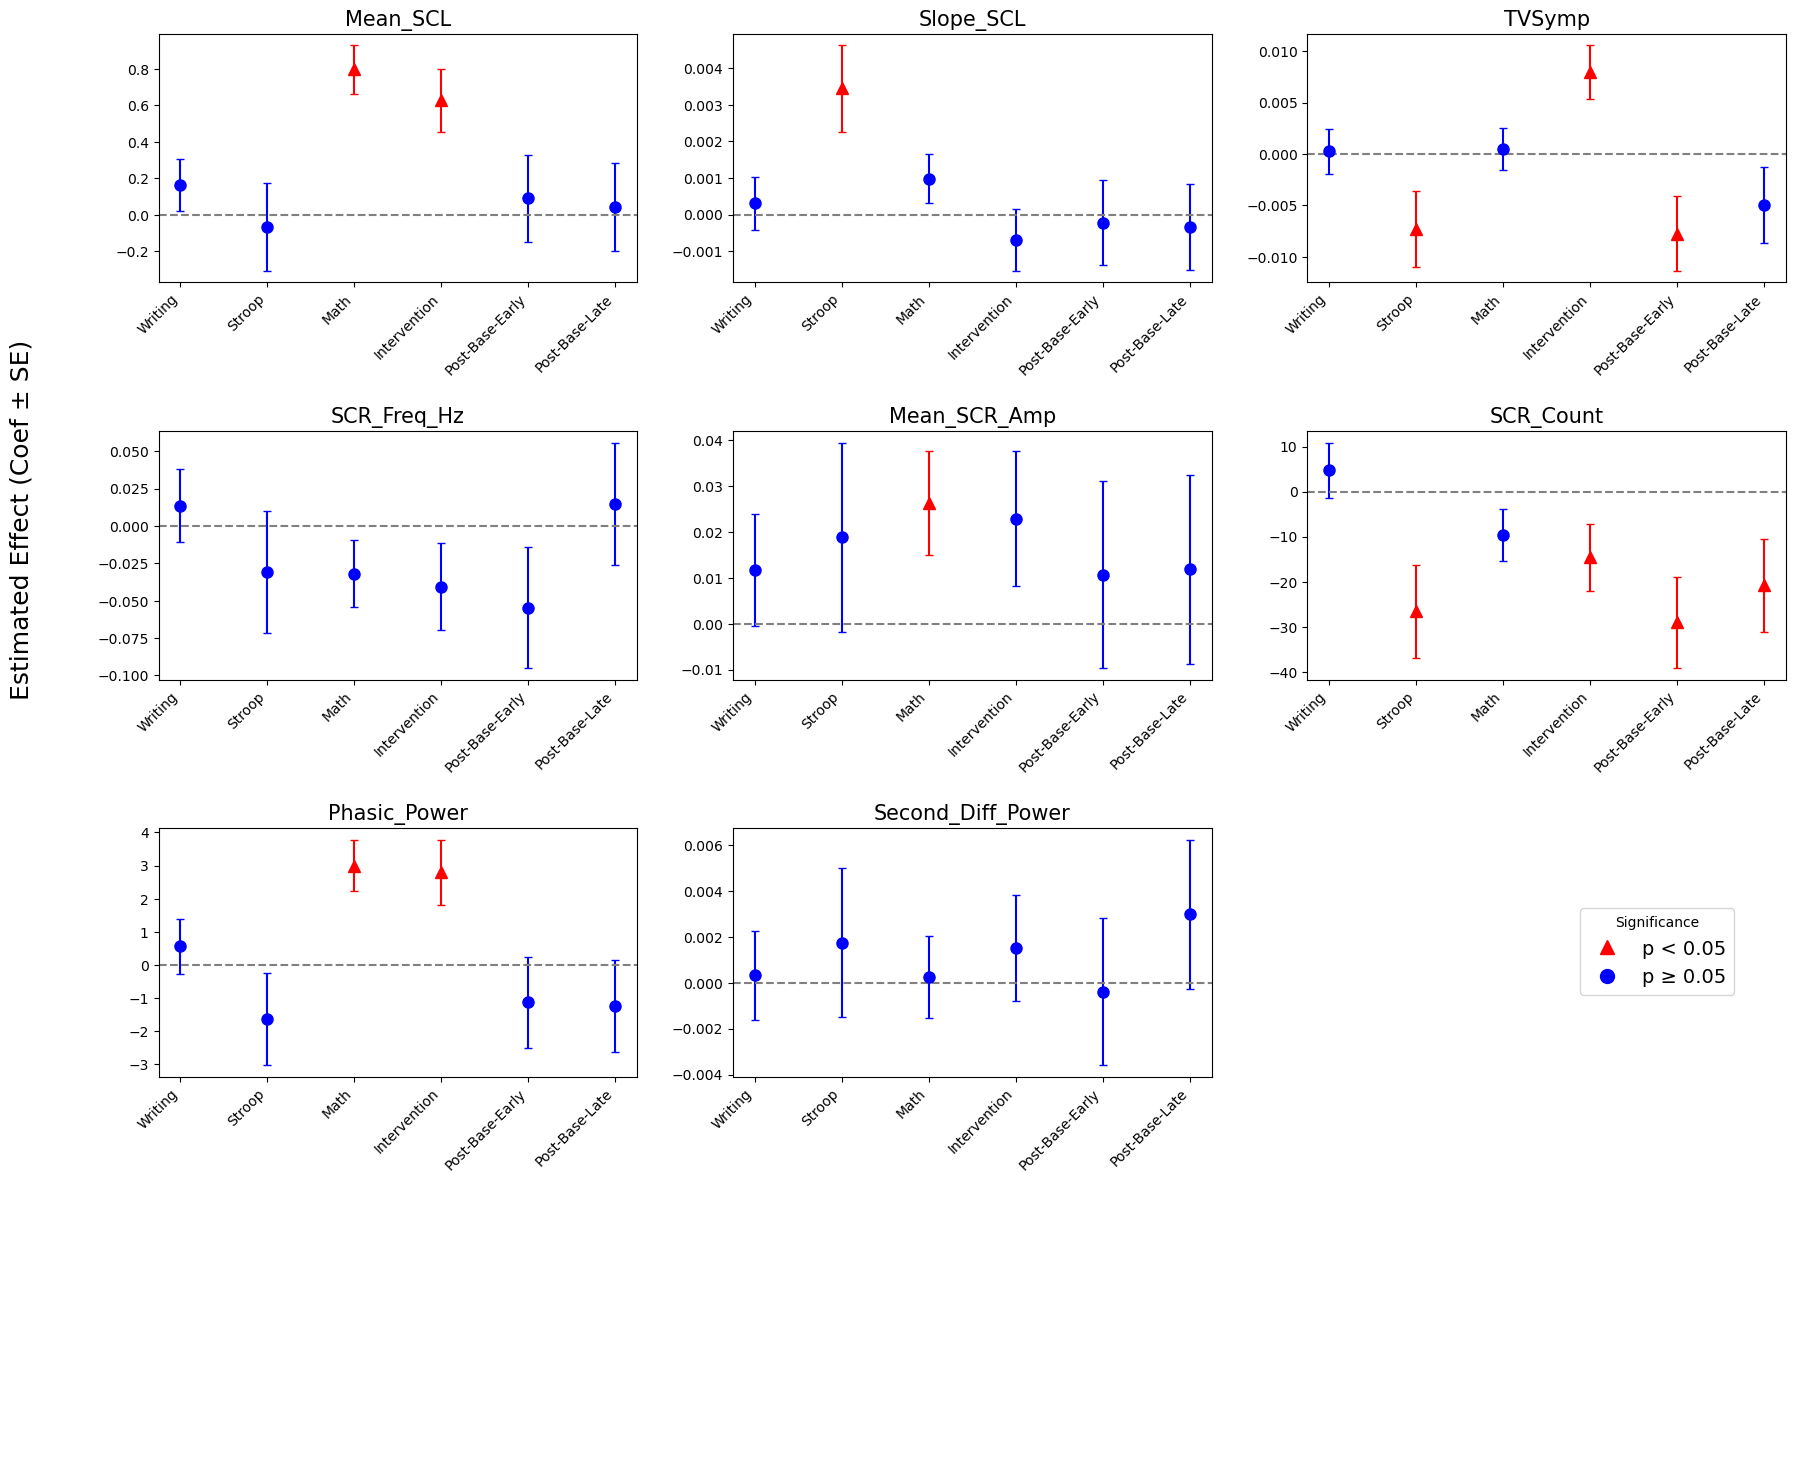

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt
rows = []

for feature, model in model_results.items():
    try:

        params = model.params        # Coefficients
        bse = model.bse              # Standard errors
        pvals = model.pvalues        # p-values
        
        for param in model.params.index:
            if "Phase[T." in param:
                rows.append({
                    "Feature": feature,
                    "Phase": param.replace("Phase[T.", "").replace("]", ""),
                    "Coef": model.params[param],
                    "SE": model.bse[param],
                    "p": model.pvalues[param]
                })
    except Exception as e:
        print(f"Failed extracting from {feature}: {e}")

df_plot = pd.DataFrame(rows)
# Load the mixed model output you saved earlier
# df_plot = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy.csv")
print(df_plot.head())




# Define phase + feature order
phase_order = [
    'Writing', 'Stroop', 'Math',
    'Intervention', 'Post-Base-Early', 'Post-Base-Late'
]

feature_order = [
    'Mean_SCL', 'Slope_SCL', 'TVSymp',
    'SCR_Freq_Hz', 'Mean_SCR_Amp', 'SCR_Count',
    'Phasic_Power', 'Second_Diff_Power',
    'Reactivity_%', 'Recovery_%'
]

df_plot["Phase"] = pd.Categorical(df_plot["Phase"], categories=phase_order, ordered=True)
print(df_plot.head())
df_plot["Feature"] = pd.Categorical(df_plot["Feature"], categories=feature_order, ordered=True)

x_positions = np.arange(len(phase_order))

def marker_for_p(p): return '^' if p < 0.05 else 'o'
def color_for_p(p):  return 'red' if p < 0.05 else 'blue'

n_features = len(feature_order)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

# ❗ Remove sharex=True so every subplot can show its xticks
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(21, 18),
    gridspec_kw={'hspace': 0.6}  # extra vertical space
)
axes = axes.flatten()

for i, feature in enumerate(feature_order):
    ax = axes[i]
    subset = df_plot[df_plot["Feature"] == feature]

    if subset.empty:
        ax.axis('off')
        continue

    subset = subset.sort_values("Phase")

    y = subset["Coef"].values
    yerr = subset["SE"].values
    markers = subset["p"].apply(marker_for_p).values
    colors = subset["p"].apply(color_for_p).values

    for xi, yi, err, m, c in zip(x_positions, y, yerr, markers, colors):
        ax.errorbar(xi, yi, yerr=err, fmt=m, color=c, markersize=8, capsize=3)

    ax.axhline(0, color="gray", linestyle="--")
    ax.set_title(feature, fontsize=15)
    

    # ❗ FORCE xticks to show on *every* subplot
    ax.set_xticks(x_positions)
    ax.set_xticklabels(phase_order, rotation=45, ha="right")

# Turn off unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Legend
fig.legend(
    handles=[
        plt.Line2D([0], [0], marker='^', color='red', linestyle='none', markersize=10),
        plt.Line2D([0], [0], marker='o', color='blue', linestyle='none', markersize=10),
    ],
    labels=['p < 0.05', 'p ≥ 0.05'],
    title="Significance",
    bbox_to_anchor=(.88, 0.4),
    fontsize=14
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(hspace=0.7, bottom=0.08)  # ensure xtick labels aren't cut
# Global Y-label for the entire figure
fig.text(
    0.06, 0.61,
    'Estimated Effect (Coef ± SE)',
    va='center', ha='center',
    rotation='vertical',
    fontsize=18
)
plt.show()
fig.savefig("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/stats/final_mixed_model_phase_effects_Timecovariate_separate_subplots.png")

In [111]:
import pandas as pd
import statsmodels.formula.api as smf

# Load data
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy_with_duration.csv")
print(data.columns)

# Define features to analyze
feature_cols = [
    'Mean_SCL', 'Reactivity_%', 'Recovery_%', 'TVSymp',
    'SCR_Freq_Hz', 'Mean_SCR_Amp', 'Slope_SCL',
    'Phasic_Power', 'Second_Diff_Power'
]

# Only keep post-intervention phases
post_phases = ['Intervention', 'Post-Base-Early', 'Post-Base-Late']
data_post = data[data["Phase"].isin(post_phases)].copy()

# Store models
model_results = {}

for feature in feature_cols:
    print(f"\n=== Running model for {feature} ===")

    # Get baseline value for the feature
    baseline = data[data["Phase"] == "Baseline"][["Participant", "Hand_Dominance", feature]]
    baseline = baseline.rename(columns={feature: f"Baseline_{feature}"})

    # Get math phase value (stress covariate)
    stress = data[data["Phase"] == "Math"][["Participant", "Hand_Dominance", feature]]
    stress = stress.rename(columns={feature: f"Math_{feature}"})

    # Merge into post-intervention data
    merged = data_post.merge(baseline, on=["Participant", "Hand_Dominance"], how="left")
    merged = merged.merge(stress, on=["Participant", "Hand_Dominance"], how="left")

    # Drop missing values
    merged_clean = merged.dropna(subset=[feature, f"Baseline_{feature}", f"Math_{feature}", "Phase_Duration_seconds"])

    # Build formula
    formula = f"{feature} ~ Phase + Hand_Dominance + Intervention_Type + Phase_Duration_seconds + Baseline_{feature} + Math_{feature}"

    try:
        model = smf.mixedlm(formula, data=merged_clean, groups=merged_clean["Participant"]).fit()
        print(model.summary())
        model_results[feature] = model
    except Exception as e:
        print(f"Model failed for {feature}: {e}")

Index(['Participant', 'Hand', 'Hand_Dominance', 'Phase',
       'Phase_Duration_seconds', 'Phase_Duration', 'Intervention_Type',
       'Artifact_%', 'Mean_SCL', 'Reactivity_%', 'Recovery_%', 'TVSymp',
       'SCR_Count', 'SCR_Freq_Hz', 'Mean_SCR_Amp', 'Slope_SCL', 'Phasic_Power',
       'Second_Diff_Power'],
      dtype='object')

=== Running model for Mean_SCL ===
                   Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        Mean_SCL
No. Observations:        104            Method:                    REML    
No. Groups:              21             Scale:                     0.2321  
Min. group size:         2              Log-Likelihood:            -90.6545
Max. group size:         6              Converged:                 No      
Mean group size:         5.0                                               
---------------------------------------------------------------------------
                                 Coef.  St

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packa

                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       SCR_Freq_Hz
No. Observations:       104           Method:                   REML       
No. Groups:             21            Scale:                    0.0083     
Min. group size:        2             Log-Likelihood:           70.3106    
Max. group size:        6             Converged:                Yes        
Mean group size:        5.0                                                
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.105    0.081  1.290 0.197 -0.055  0.265
Phase[T.Post-Base-Early]         -0.030    0.056 -0.528 0.597 -0.139  0.080
Phase[T.Post-Base-Late]           0.040    0.057  0.711 0.477 -0.071  0.151
Hand_Dominance[T.Non-Dominant] 

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/s

In [114]:
import pandas as pd
import statsmodels.formula.api as smf

# Load your data
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy_with_duration.csv")

# Drop rows where key variables are missing
data = data.dropna(subset=["Mean_SCL", "Phase", "Hand_Dominance"])

# Set Hand_Dominance as categorical with order
data["Hand_Dominance"] = pd.Categorical(data["Hand_Dominance"], categories=["Non-Dominant", "Dominant"], ordered=True)

# Optional: also set Phase as ordered categorical, based on your study protocol
phase_order = ["Baseline", "Writing", "Stroop", "Math", "Intervention", "Post-Base-Early", "Post-Base-Late"]
data["Phase"] = pd.Categorical(data["Phase"], categories=phase_order, ordered=True)

# Merge in Baseline per hand
baseline = data[data["Phase"] == "Baseline"][["Participant", "Hand_Dominance", "Mean_SCL"]]
baseline = baseline.rename(columns={"Mean_SCL": "Baseline_SCL"})
data = pd.merge(data, baseline, on=["Participant", "Hand_Dominance"], how="left")

# Drop rows missing baseline or duration
data = data.dropna(subset=["Baseline_SCL", "Phase_Duration_seconds"])

# Fit model
model = smf.mixedlm("Mean_SCL ~ Phase * Hand_Dominance + Baseline_SCL +  Phase_Duration_seconds",
                    data=data,
                    groups=data["Participant"]).fit()

print(model.summary())

                            Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              Mean_SCL 
No. Observations:              242                  Method:                          REML     
No. Groups:                    21                   Scale:                           0.3295   
Min. group size:               6                    Log-Likelihood:                  -245.0677
Max. group size:               14                   Converged:                       Yes      
Mean group size:               11.5                                                           
----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                            0.203    0.381  0.532 0.59

In [115]:
import pandas as pd
import statsmodels.formula.api as smf

# Load your data
data = pd.read_csv("/Users/summerghorbani/Documents/MIT_projects/Molly/Results/features/study_phase_features_biosppy_with_duration.csv")

# Define feature columns to model
feature_cols = [
    'Mean_SCL', 'Reactivity_%', 'Recovery_%', 'TVSymp', 'SCR_Count',
    'SCR_Freq_Hz', 'Mean_SCR_Amp', 'Slope_SCL', 'Phasic_Power', 'Second_Diff_Power'
]

# Set categorical order for phase
phase_order = ["Baseline", "Writing", "Stroop", "Math", "Intervention", "Post-Base-Early", "Post-Base-Late"]
data["Phase"] = pd.Categorical(data["Phase"], categories=phase_order, ordered=True)
data["Hand_Dominance"] = pd.Categorical(data["Hand_Dominance"], categories=["Non-Dominant", "Dominant"], ordered=True)

# Container for results
model_results = {}

for feature in feature_cols:
    print(f"\n=== Running model for {feature} ===")

    # Extract baseline value for each participant and hand
    baseline = data[data["Phase"] == "Baseline"][["Participant", "Hand_Dominance", feature]]
    baseline = baseline.rename(columns={feature: f"Baseline_{feature}"})

    # Merge baseline into full dataset
    merged = pd.merge(data, baseline, on=["Participant", "Hand_Dominance"], how="left")

    # Drop rows with missing data
    merged_clean = merged.dropna(subset=[feature, f"Baseline_{feature}", "Phase_Duration_seconds"])

    # Define model formula
    formula = f"{feature} ~ Phase * Hand_Dominance + Baseline_{feature} + Phase_Duration_seconds"

    try:
        model = smf.mixedlm(formula, data=merged_clean, groups=merged_clean["Participant"]).fit()
        model_results[feature] = model
        print(model.summary())
    except Exception as e:
        print(f"Model failed for {feature}: {e}")


=== Running model for Mean_SCL ===
                            Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              Mean_SCL 
No. Observations:              242                  Method:                          REML     
No. Groups:                    21                   Scale:                           0.3295   
Min. group size:               6                    Log-Likelihood:                  -245.0677
Max. group size:               14                   Converged:                       Yes      
Mean group size:               11.5                                                           
----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                  

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                            Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              Slope_SCL
No. Observations:              242                  Method:                          REML     
No. Groups:                    21                   Scale:                           0.0000   
Min. group size:               6                    Log-Likelihood:                  976.1067 
Max. group size:               14                   Converged:                       No       
Mean group size:               11.5                                                           
----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                           -0.000    0.002 -0.077 0.93

/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/summerghorbani/miniconda3/envs/sensecode2/lib/python3.9/site-packa